In [13]:
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Cargar el conjunto de datos
housing = fetch_california_housing()

In [15]:
# Crear conjuntos de datos de entrenamiento, validación y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('X_valid:', X_valid.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
print('y_valid:', y_valid.shape)

X_train: (11610, 8)
X_test: (5160, 8)
X_valid: (3870, 8)
y_train: (11610,)
y_test: (5160,)
y_valid: (3870,)


In [16]:
# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [17]:
# Crear el modelo de red neuronal
model = keras.models.Sequential([keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]), 
                                 keras.layers.Dense(1)])

d:\Academia\Talent-tech\AI\.env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compilar el modelo
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=[keras.metrics.RootMeanSquaredError(),'mean_absolute_percentage_error'])

In [19]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5113 - mean_absolute_percentage_error: 47.0049 - root_mean_squared_error: 1.1860 - val_loss: 21.8857 - val_mean_absolute_percentage_error: 39.2044 - val_root_mean_squared_error: 4.6782
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7902 - mean_absolute_percentage_error: 33.0930 - root_mean_squared_error: 1.2604 - val_loss: 8.5699 - val_mean_absolute_percentage_error: 32.6429 - val_root_mean_squared_error: 2.9274
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0058 - mean_absolute_percentage_error: 34.1817 - root_mean_squared_error: 1.3704 - val_loss: 0.4105 - val_mean_absolute_percentage_error: 25.8618 - val_root_mean_squared_error: 0.6407
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4483 - mean_absolute_percentage_error: 26.5449 - root_mean_squared_error: 0.6690 - val_loss: 0.4194 - val_mean_absolute_percentage_error: 26.8996 - val_root_mean_squared_error: 0.6476
Epoch 5/10
363/

<Axes: >

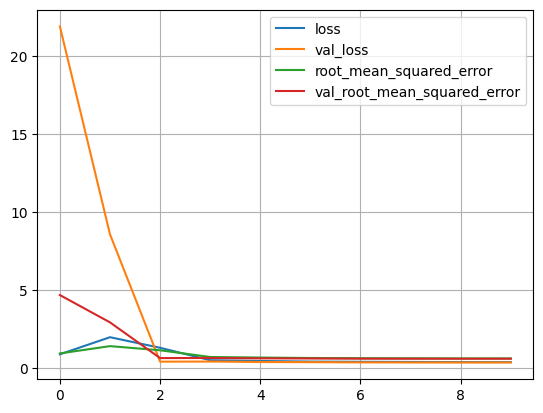

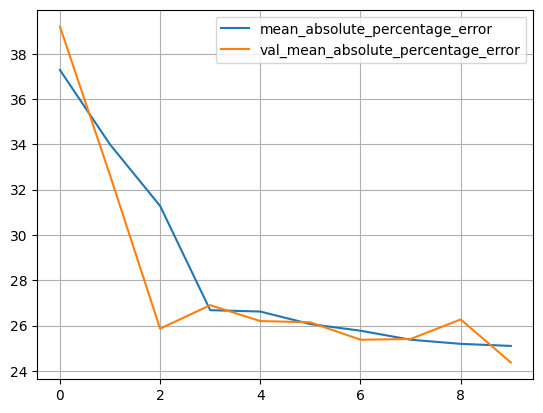

In [20]:
# Graficar el historial de entrenamiento
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error','val_mean_absolute_percentage_error']].plot(grid=True)

In [21]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("loss train: ", loss)
print("root_mean_squared_error train: ", RMSE)
print("mean_absolute_percentange_error train: ",MAPE)

#Evaluar el modelo en el conjunto de validación
loss, RMSE, MAPE = model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en el conjunto de validación")
print("loss valid: ", loss)
print("root_mean_squared_error valid: ", RMSE)
print("mean_absolute_percentange_error valid: ",MAPE)

#Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print("Evaluar el modelo en el conjunto de prueba")
print("loss test: ", loss)
print("root_mean_squared_error test: ", RMSE)
print("mean_absolute_percentange_error test: ",MAPE)



363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 0.3817 - mean_absolute_percentage_error: 24.7735 - root_mean_squared_error: 0.6176
Evaluar el modelo en el conjunto de entrenamiento
loss train:  0.3826488256454468
root_mean_squared_error train:  0.6185861229896545
mean_absolute_percentange_error train:  24.624622344970703
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3838 - mean_absolute_percentage_error: 24.7088 - root_mean_squared_error: 0.6186
Evaluar el modelo en el conjunto de validación
loss valid:  0.36038443446159363
root_mean_squared_error valid:  0.6003202795982361
mean_absolute_percentange_error valid:  24.36979866027832
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3954 - mean_absolute_percentage_error: 24.6569 - root_mean_squared_error: 0.6286
Evaluar el modelo en el conjunto de prueba
loss test:  0.392900675535202
root_mean_squared_error test:  0.6268178820610046
mean_absolute_percentange_error test:  24.81557273864746
